<a href="https://colab.research.google.com/github/dhuMuhammadasif/test/blob/master/Project1Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/My Drive/


/content/drive/My Drive


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
df =pd.read_excel('/content/drive/My Drive/Data/data.xlsx')

In [ ]:

df.head()

,x,y
0,-0.016479,0.012032
1,-0.016479,0.014321
2,-0.016174,0.012338
3,-0.014038,0.013406
4,0.001526,0.012338


In [ ]:
df.loc[: , 'x']

0      -0.016479
1      -0.016479
2      -0.016174
3      -0.014038
4       0.001526
          ...   
2427    0.033569
2428    0.024719
2429    0.014954
2430    0.009155
2431    0.001831
Name: x, Length: 2432, dtype: float64

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


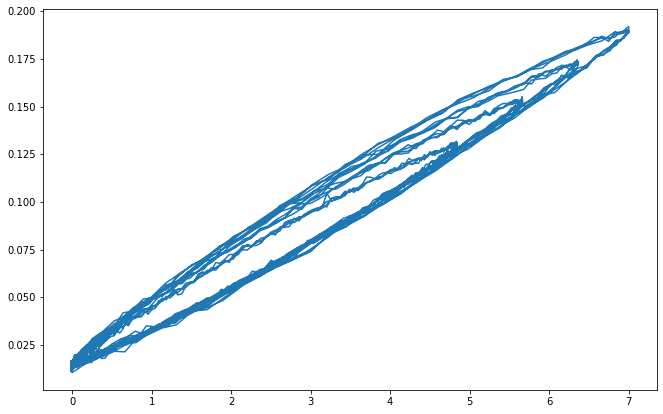

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
train_x = np.array(df['x'])
train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
plt.plot(train_x, train_y)
#plt.plot(val_x, val_y)

plt.show()

In [ ]:
import scipy as sp
import scipy.signal
import os
import numpy as np
#import matplotlib.pyplot as plt

In [ ]:
def ewma_vectorized(data, window):
    alpha = 3 /(window + 3)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+2)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    
    return out

In [ ]:
train_x = np.array(df['x'])
train_y=np.array(df['y'])

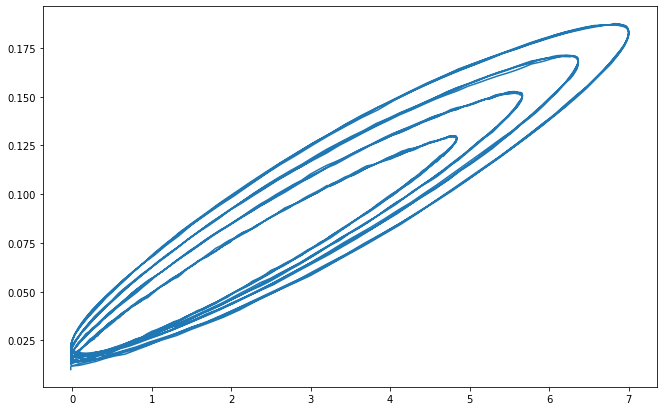

In [ ]:
import numpy as np
#import matplotlib.pyplot as plt
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)

train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

Applying the Least Square on the Data

In [ ]:
import numpy as np
from scipy import stats

# Sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([3, 5, 7, 9, 11])

# Calculate the slope, intercept, r_value, p_value, and std_err
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Use the equation of the regression line to make predictions
x_pred = 6
y_pred = slope * x_pred + intercept

# Print the results
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-value: ", r_value)
print("P-value: ", p_value)
print("Standard error: ", std_err)
print("Predicted value for x = 6: ", y_pred)


Slope:  2.0
Intercept:  1.0
R-value:  1.0
P-value:  1.2004217548761408e-30
Standard error:  0.0
Predicted value for x = 6:  13.0


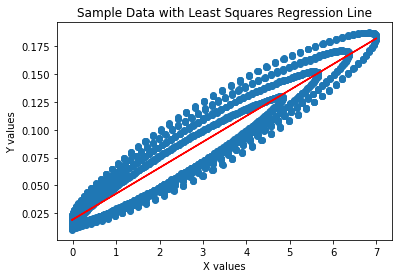

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data
#X = np.array([1, 2, 3, 4, 5])
#Y = np.array([3, 5, 7, 9, 11])

# Calculate the slope and intercept of the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(train_x, train_y)

# Create a scatter plot of the data
plt.scatter(train_x, train_y)

# Add the regression line to the plot
plt.plot(train_x, slope*train_x + intercept, color='red')

# Add axis labels and a title to the plot
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Sample Data with Least Squares Regression Line')

# Show the plot
plt.show()


In [ ]:
X = df.iloc[:, 0].values

In [ ]:
import numpy as np
import math
def fun(x,train_x,train_y):
  
       y= np.array(x[0]-x[1]*np.exp(-abs(train_x-(train_x-1))))*(train_x-(train_x-1))+x[2]*(train_x-(train_x-1))- train_y 
       return y 

In [ ]:
from scipy.optimize import least_squares

In [ ]:
x0=np.array([1.0, 1.0, 1.0])


In [ ]:
res_lsq=least_squares(fun,x0,args=(train_x,train_y))

In [ ]:
res_lsq.x

array([-1.80982101,  3.95197581,  3.34854918])

In [ ]:
import numpy as np

# Generate some dummy data for training
train_x = train_x
y = train_y

# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(t-(t-1))))*(t-(t-1))+x[2]*(t-(t-1))

# Initialize the parameter estimates and the covariance matrix
x = np.array([0, 0, 0])
P = np.eye(3)

# Define the forgetting factor and the regularization parameter
lambda_ = 0.99
delta = 1e-6

# Iterate over the training data
for i in range(len(train_x)):
    # Compute the predicted output and the error
    y_pred = f(x, train_x[i])
    e = y[i] - y_pred

    # Compute the Kalman gain
    z = (train_x[i]-(train_x[i]-1)) * np.exp(-abs(train_x[i]-(train_x[i]-1)))
    X = np.array([z, train_x[i]-(train_x[i]-1), 1])
    K = P.dot(X) / (lambda_ + X.dot(P).dot(X))

    # Update the parameter estimates and the covariance matrix
    x = x + K * e
    P = (P - K.reshape((3, 1)).dot(X.reshape((1, 3))).dot(P)) / lambda_ + delta

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(x[0], x[1], x[2]))


x[0] = 0.0256, x[1] = 0.0767, x[2] = 0.0767


In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Generate some dummy data for training
train_x = train_x
train_y = train_y

# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(t-(t-1))))*(t-(t-1))+x[2]*(t-(t-1))

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    return f(x, train_x) - train_y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))


x[0] = 0.0573, x[1] = 1.3212, x[2] = 0.5136


In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Generate some dummy data for training
train_x = train_x
train_y = train_y

# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(t-(t-1))))*(t-(t-1))+x[2]*(t-(t-1))

# Define the residual function for the optimization problem
def fun(x,train_x,train_y):
       y = np.array(x[0]-x[1]*np.exp(-abs(train_x-(train_x-1))))*(train_x-(train_x-1))+x[2]*(train_x-(train_x-1))- train_y 
       return y     

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))


x[0] = 0.0573, x[1] = 1.3212, x[2] = 0.5136


In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Generate some dummy data for training
train_x = train_x
train_y = train_y

# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(t-(t-1))))*(t-(t-1))+x[2]*(t-(t-1))

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    y = f(x, train_x) - train_y
    return y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))


x[0] = 0.0573, x[1] = 1.3212, x[2] = 0.5136


x[0] = 0.0573, x[1] = 1.3212, x[2] = 0.5136


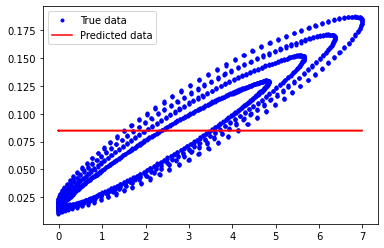

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some dummy data for training
train_x = train_x
train_y = train_y
# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(t-(t-1))))*(t-(t-1))+x[2]*(t-(t-1))

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    y = f(x, train_x) - train_y
    return y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))

# Evaluate the function with the estimated parameter values
y_pred = f(res.x, train_x)

# Plot the true data and the predicted data
plt.plot(train_x, train_y, 'b.', label='True data')
plt.plot(train_x, y_pred, 'r-', label='Predicted data')
plt.legend()
plt.show()


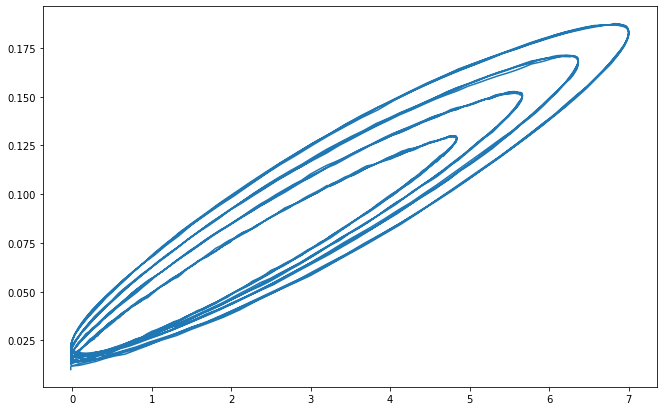

x[0] = 0.0573, x[1] = 1.3212, x[2] = 0.5136


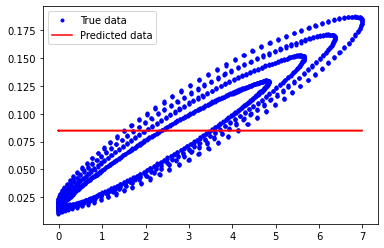

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)

train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

# Generate some dummy data for training
train_x = train_x
train_y = train_y
# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(t-(t-1))))*(t-(t-1))+x[2]*(t-(t-1))

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    y = f(x, train_x) - train_y
    return y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))

# Evaluate the function with the estimated parameter values
y_pred = f(res.x, train_x)

# Plot the true data and the predicted data
plt.plot(train_x, train_y, 'b.', label='True data')
plt.plot(train_x, y_pred, 'r-', label='Predicted data')
plt.legend()
plt.show()



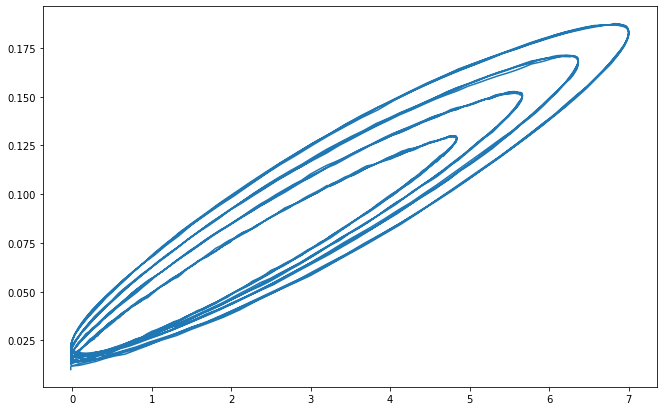

x[0] = 0.3623, x[1] = 0.9323, x[2] = 0.0232


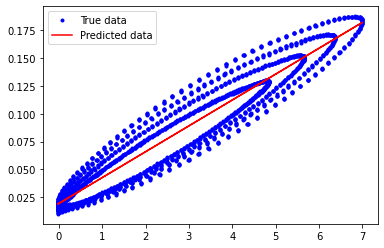

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)

train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

# Generate some dummy data for training
train_x = train_x
train_y = train_y
# Define the nonlinear function
def f(x, t):
    return (x[0]-x[1]*np.exp(-abs(t-(t-1))))*(t-(t-1))+x[2]*(t)

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    y = f(x, train_x) - train_y
    return y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))

# Evaluate the function with the estimated parameter values
y_pred = f(res.x, train_x)

# Plot the true data and the predicted data
plt.plot(train_x, train_y, 'b.', label='True data')
plt.plot(train_x, y_pred, 'r-', label='Predicted data')
plt.legend()
plt.show()



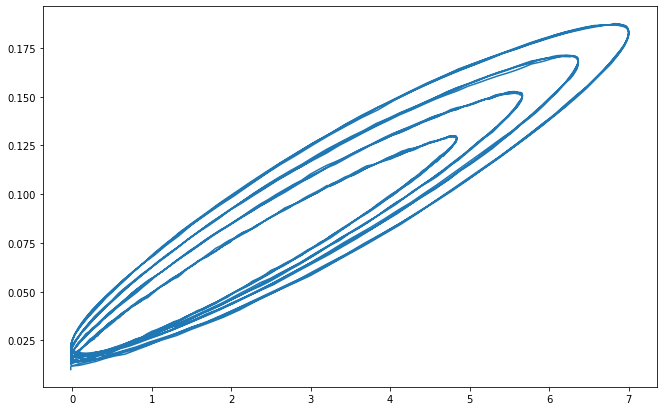

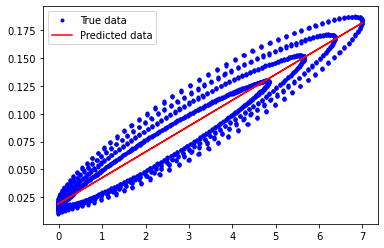

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)

train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

# Generate some dummy data for training
train_x = train_x
train_y = train_y
# Define the nonlinear function
def f(t):
    return (0.3623-0.9323*np.exp(-abs(t-(t-1))))*(t-(t-1))+0.0232*(t)

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    y = f(train_x) - train_y
    return y

# Initialize the parameter estimates
#x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
#print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))

# Evaluate the function with the estimated parameter values
y_pred = f(train_x)

# Plot the true data and the predicted data
plt.plot(train_x, train_y, 'b.', label='True data')
plt.plot(train_x, y_pred, 'r-', label='Predicted data')
plt.legend()
plt.show()



[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

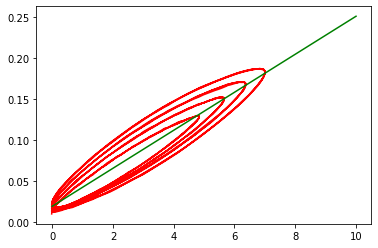

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return (0.3623-0.9323*np.exp(-abs(t-(t-1))))*(t-(t-1))+0.0232*(t)

# Generate random parameter values
#x_true = np.random.normal(0, 1, size=3)
plt.plot(train_x, train_y, 'red', label='True data')
# Generate random time points
t = np.linspace(0.1, 1, 10)
print (t)
# Generate random data
y = f(t)
# Plot the true data
plt.plot(t, y, 'green')
plt.show()


[ 0.         -0.04618467 -0.07601257 -0.09184093 -0.09572504 -0.08945446
 -0.07458516 -0.05246785 -0.02427306  0.00898668  0.04643732  0.08732597
  0.13100578  0.17692241  0.2246023   0.27364224  0.3237002   0.37448733
  0.4257609   0.47731807  0.52899049  0.58063955  0.6321522   0.68343734
  0.73442263  0.78505172  0.83528186  0.88508182  0.93443003  0.98331305
  1.03172418  1.07966231  1.12713091  1.17413712  1.22069107  1.2668052
  1.31249374  1.35777223  1.40265717  1.44716566  1.49131517  1.53512326
  1.57860744  1.62178502  1.66467296  1.70728778  1.74964553  1.79176168
  1.83365109  1.87532801  1.91680604  1.95809813  1.99921657  2.04017301
  2.08097847  2.12164335  2.16217742  2.2025899   2.24288943  2.28308412
  2.32318156  2.36318884  2.4031126   2.44295904  2.48273392  2.52244263
  2.56209016  2.60168117  2.64121998  2.68071061  2.72015678  2.75956196
  2.79892933  2.83826186  2.8775623   2.91683318  2.95607686  2.99529549
  3.03449109  3.07366549  3.11282042  3.15195744  3.

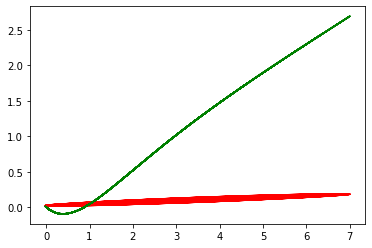

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
     ya = (0.3623-0.9323*np.exp(-abs(t-(0))))*(t-(0))+0.0232*(t)
     return ya

plt.plot(train_x, train_y, 'red', label='True data')
plt.plot(train_x, f(train_x), 'green', label='Function Return Data')
plt.show()


[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

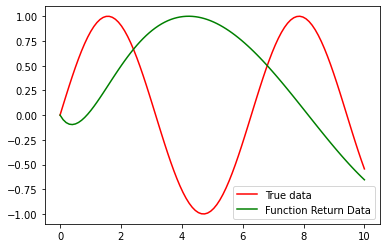

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
     ya = (0.3623-0.9323*np.exp(-abs(t-(0))))*(t-(0))+0.0232*(t)
     return ya

train_x = train_x
train_y = train_y
# Generate the true data
train_y = np.sin(train_x)

# Generate the function return data
f_data = f(train_x)
f_data_sin = np.sin(f_data)

# Plot the true data and the function return data
plt.plot(train_x, train_y, 'red', label='True data')
plt.plot(train_x, f_data_sin, 'green', label='Function Return Data')
plt.legend()
plt.show()


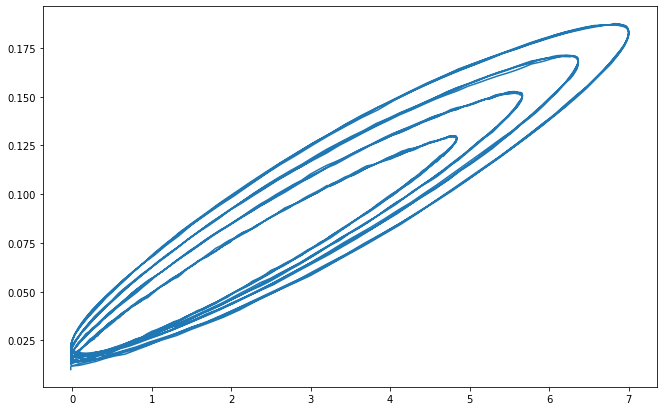

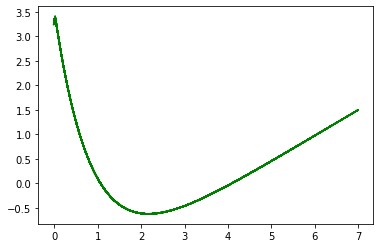

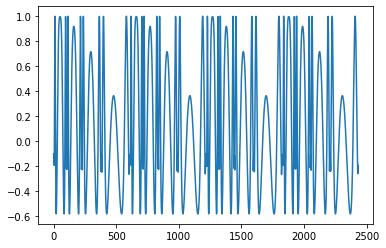

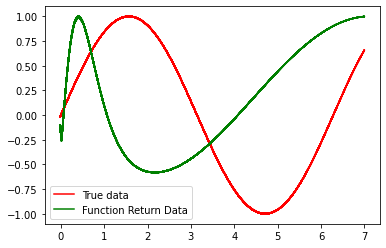

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)

train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

def f(t):
     ya = (0.3623-0.9323*np.exp(-abs(t-(0.016784668))))*(t-(6.0010375977))+0.0232*(t*7.0010375977)
     return ya

# Generate the true data
train_y = np.sin(train_x)




plt.plot(train_x, f(train_x), 'green')
plt.show()
#plt.plot(f(train_x), 'red')
#plt.show()





# Generate the function return data
f_data = f(train_x)
f_data_sin = np.sin(f_data)
plt.plot(f_data_sin)
plt.show()

# Plot the true data and the function return data
plt.plot(train_x, train_y, 'red', label='True data')
plt.plot(train_x, f_data_sin, 'green', label='Function Return Data')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# load time series data into a pandas DataFrame
df =pd.read_excel('/content/drive/My Drive/Data/data.xlsx')

# find maximum and minimum values of the data
max_val = df['x'].max()
min_val = df['x'].min()
result = df.iloc[-1]['x'] - df.iloc[-2]['x']
# print the results
print(f"Maximum value: {max_val}")
print(f"Minimum value: {min_val}")
print(result)

Maximum value: 7.0010375977
Minimum value: -0.016784668
-0.0073242187


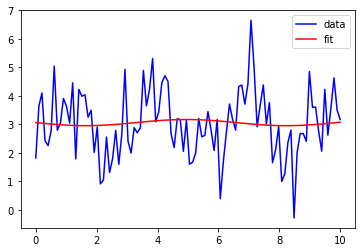

The fitted function is: f(t) = -0.11 * sin(0.95 * t) + 3.07


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define the function to fit to the data
def f(t, a, b, c):
    return a * np.sin(b * t) + c

# generate some time series data
t = np.linspace(0, 10, 100)
data = f(t, 1, 2, 3) + np.random.normal(size=len(t))

# plot the data
plt.plot(t, data, 'b-', label='data')

# fit the function to the data using curve_fit
popt, pcov = curve_fit(f, t, data)

# plot the fitted function
plt.plot(t, f(t, *popt), 'r-', label='fit')

# add legend and show the plot
plt.legend()
plt.show()

# print the parameters of the fitted function
print(f"The fitted function is: f(t) = {popt[0]:.2f} * sin({popt[1]:.2f} * t) + {popt[2]:.2f}")
